# Quick Start (H$_2$CO)

## 1. Install and Satisfy requirements

See [documenstaion](https://kenhino.github.io/PyVibLocalizer/README.html).

## 2. Import modules

In [1]:
import mendeleev
import numpy as np
import scipy

In [2]:
try:
    import bpy
except ImportError:
    print('You cannot use Blender in Jupyter')
    print('You must select jupyter kernel as blender when you use blender')
    import matplotlib
try:
    import ase
    import ase.db
except ImportError:
    print('You cannot use ASE')

You cannot use Blender in Jupyter
You must select jupyter kernel as blender when you use blender


In [3]:
try:
    import pyvib
except ImportError:
    print('Try execute in `src` directory or set $PYTHONPATH to pyvib')

## 3. Prepare Geometry

Define
- atom element
- coordinate

For example,
```python
geom = [['C', (0.0, 0.0, 0.0)],
        ['H', (1,0, 1.0, 1.0)]]
```

Here, I use precalculated `ase` database.

In [4]:
geom, _ = pyvib.read_fchk_g16('./sample/ch2o.fchk')

In [5]:
geom

[['O', (1.1408368, -0.000491967682, -0.000123437584)],
 ['C', (-1.13435014, 8.64849597e-05, -9.5923766e-06)],
 ['H', (-2.27091334, 0.465150475, -1.72441985)],
 ['H', (-2.27091603, -0.464367047, 1.72455288)]]

## 4. Prepate mass-wighted hessian

Define
- mass-weighted hessian (unit is a.u.)

Mass-weighted hessian is matrix $M_{ij}=\frac{\partial^2 E}{\partial\sqrt{m_i}x_i\partial\sqrt{m_j}x_j}$ of the second derivative of energy $E$ in terms of mw coordinates $\sqrt{m_i}x_i$. You can also obtain mw-hessian from harmonic frequency and displacement vectors.

You can use `pyvib.read_fchk_g16()` for [Gaussian16](https://gaussian.com/gaussian16/) or `pyvib.read_minfo()` for [SINDO](https://tms.riken.jp/research/software/sindo/)

In [6]:
_, mw_hess = pyvib.read_fchk_g16('./sample/ch2o.fchk')

In [7]:
mw_hess.shape

(12, 12)

## 5. Set PyViblocalizer
- Set geometry and (hessian or (displacement vector and frequency))
- Input units can be specified in options, such as `unit_mass='AMU'` 

In large system, it may takes a few minutes

In [8]:
vib = pyvib.Vibration(geom, mw_hess=np.array(mw_hess), 
                      unit_omega='hartree', unit_mass='AMU')

/Users/hinom/GitHub/PyVibLocalizer/src/local_cls.py:151: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.diag(self.unitary.T@self.mw_hess@self.unitary).tolist()))


## 6.1. Visualize in Tkinter+matplotlib

## 6.2. Visualize in Blender

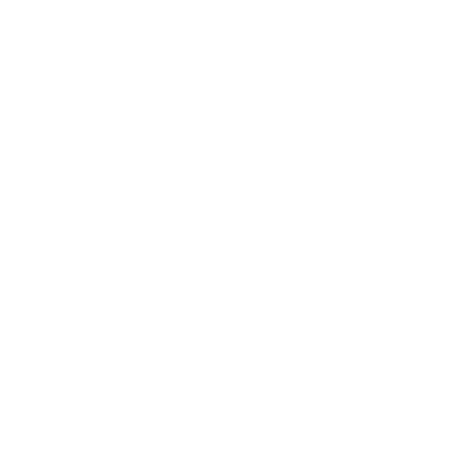

In [9]:
try:
    import bpy
    vib.visualize(blender=True)
except ImportError:
    '''Not recommended'''
    vib.visualize(blender=False)

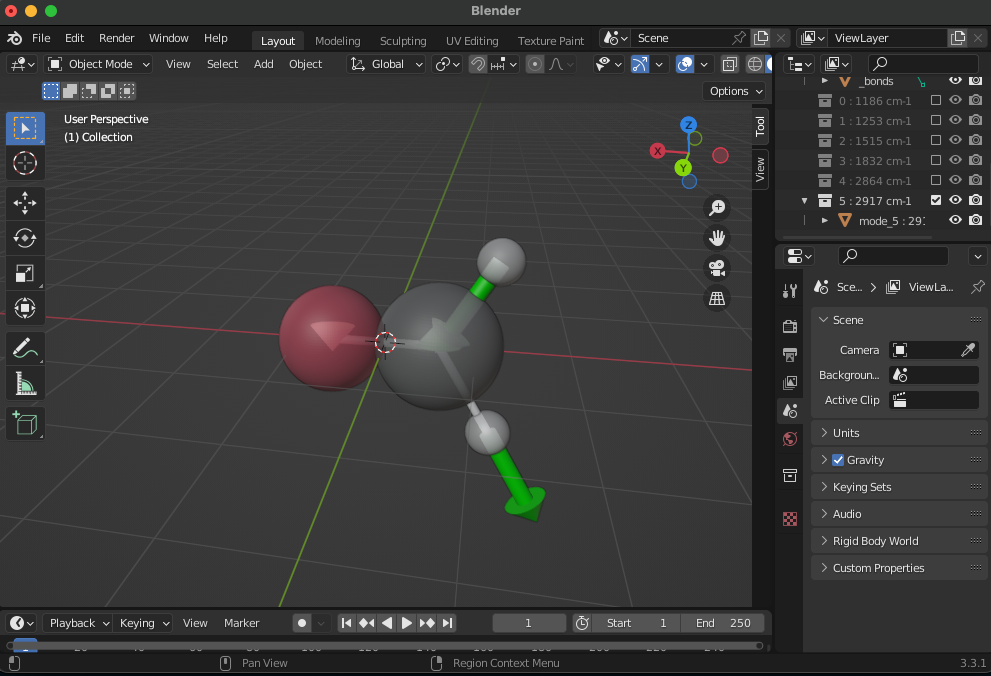

## 7. Localization
Returns displacement vecotors in a.u. and frequency in a.u.

## 7.1 Group Localization

In [10]:
vib = pyvib.Vibration(geom, mw_hess=np.array(mw_hess), 
                      unit_omega='hartree', unit_mass='AMU')
disp, freq = vib.group_localize(domain=[[0,1],[2,3]], mw_hess=np.array(mw_hess), 
                                   unit_omega='hartree', unit_mass='AMU')
freq

/Users/hinom/GitHub/PyVibLocalizer/src/local_cls.py:151: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.diag(self.unitary.T@self.mw_hess@self.unitary).tolist()))


[nan, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0]

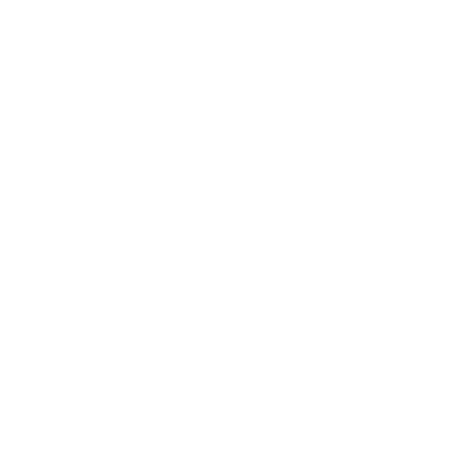

In [11]:
try:
    import bpy
    vib.visualize(blender=True)
except ImportError:
    vib.visualize(blender=False)

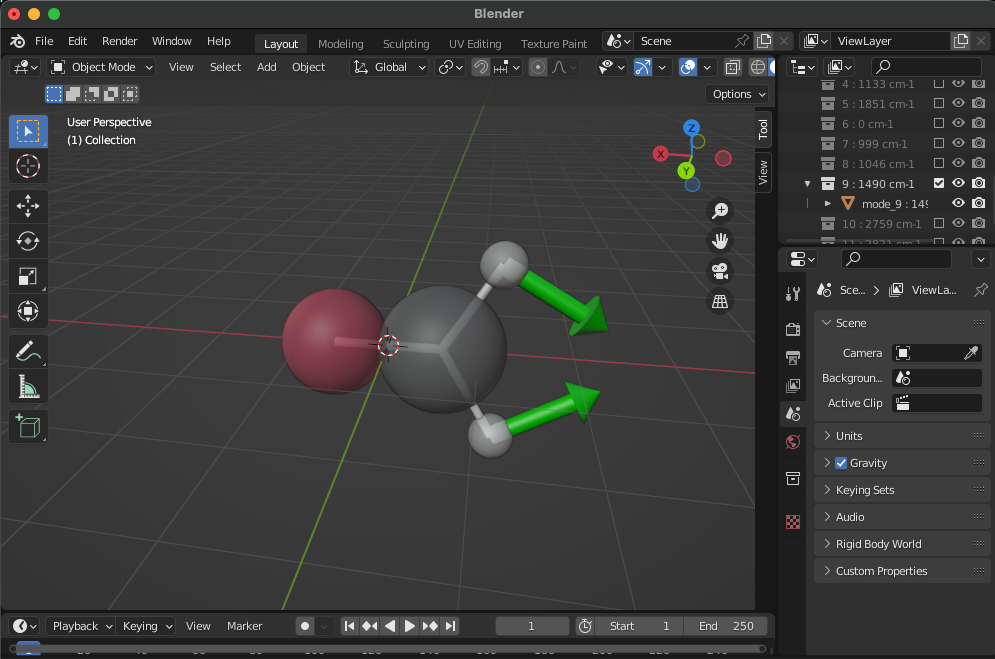

## 7.2. Metric Localization

In [12]:
vib = pyvib.Vibration(geom, mw_hess=np.array(mw_hess), 
                      unit_omega='hartree', unit_mass='AMU')
disp, freq = vib.localize(option='Boys', window= 500)
freq

initial zeta =  9.663694155840208
0 zeta =  11.741670539368313 delta = 11.741670539368313
1 zeta =  11.792772458182252 delta = 0.05110191881393966
2 zeta =  11.794469383941033 delta = 0.0016969257587806652
3 zeta =  11.794534130482885 delta = 6.47465418524007e-05
4 zeta =  11.794534695091262 delta = 5.646083760524334e-07

 localized hessian [cm-2]
[[       0        0        0        0        0        0]
 [       0        0        0        0        0        0]
 [       0        0        0        0        0        0]
 [       0        0        0        0        0        0]
 [       0        0        0        0        0        0]
 [       0        0        0        0        0        0]] 

[[       0        0        0        0        0        0]
 [       0        0        0        0        0        0]
 [       0        0        0        0        0        0]
 [       0        0        0        0        0        0]
 [       0        0        0        0        0        0]
 [       0        0 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

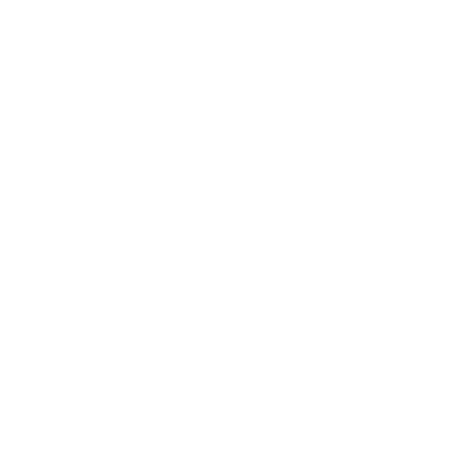

In [13]:
try:
    import bpy
    vib.visualize(blender=True)
except ImportError:
    vib.visualize(blender=False)